In [4]:
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

sns.set_context('poster')
sns.set_style('whitegrid')


from sklearn.tree import export_graphviz


#Trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer #One hot encoding
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
 
from IPython.display import Image 

#Bootstrap
from sklearn.utils import resample

%matplotlib inline

In [5]:
data = pd.read_json("rawData/cleaned.json")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 9999
Data columns (total 39 columns):
Balcony                 41918 non-null int64
Cats_Allowed            41918 non-null int64
Common_Outdoor_Space    41918 non-null int64
Dining_Room             41918 non-null int64
Dishwasher              41918 non-null int64
Dogs_Allowed            41918 non-null int64
Doorman                 41918 non-null int64
Elevator                41918 non-null int64
Exclusive               41918 non-null int64
Fitness_Center          41918 non-null int64
Garden_Patio            41918 non-null int64
Hardwood_Floors         41918 non-null int64
High_Speed_Internet     41918 non-null int64
Laundry_in_Unit         41918 non-null int64
Loft                    41918 non-null int64
New_Construction        41918 non-null int64
No_Fee                  41918 non-null int64
Outdoor_Space           41918 non-null int64
Pre_War                 41918 non-null int64
Roof_Deck               41918 non-nul

In [9]:
train_init, test_init = train_test_split(data,test_size = .3,random_state = 42)

train = train_init.drop(['interest_level','description','display_address','created','building_id','features', 'manager_id', 'street_address'], axis=1)
test = test_init.drop(['interest_level','description','display_address','created','building_id','features', 'manager_id', 'street_address'], axis=1)
y_train = train_init['interest_level']
y_test = test_init['interest_level']

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(train)  
train_transformed = scaler.transform(train)  
# apply same transformation to test data
X_test_transformed = scaler.transform(test)

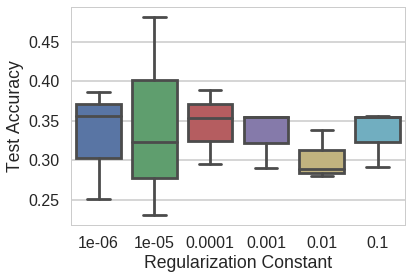

In [20]:
# Perform cross validation to tune the regularization constant

score = np.array([])# Array to store Misclassification Error
alphas = np.array([]) # Array to store tree depth

10.0 ** -np.arange(1, 7)

clf = MLPClassifier(solver='lbfgs',warm_start=True,hidden_layer_sizes=(40)) #Define model ot be used
for trial in range(3):
    cv_method = KFold(n_splits=10,shuffle=True) #Define CV method
    for a in 10.0** -np.arange(1,7):
        clf.set_params(alpha = a)
        alphas = np.append(alphas,a)
        error = np.mean(cross_val_score(clf,train,y_train,cv = cv_method,scoring = 'accuracy')) #Run cross validation
        score = np.append(score,error)
        
sns.boxplot(x = alphas,y = score)
plt.xlabel('Regularization Constant')
plt.ylabel('Test Accuracy')